FIGURE 1
  name                                           geometry
0   AB  POLYGON ((-2.210914257091547 56.88580453335538...
1   AL  POLYGON ((-0.3713768893290278 51.6872990427223...
2    B  POLYGON ((-2.054359660178655 52.24755747627114...
3   BA  POLYGON ((-2.084295514297709 51.31717052350098...
4   BB  POLYGON ((-2.215571252608544 53.73160415979756...
FIGURE 2
   name                                           geometry
0  AB10  POLYGON ((-2.116454759005259 57.14656265903432...
1  AB11  (POLYGON ((-2.052573095588467 57.1342600856536...
2  AB12  (POLYGON ((-2.128066321470298 57.0368357386797...
3  AB13  POLYGON ((-2.261525922489881 57.10693578217748...
4  AB14  POLYGON ((-2.261525922489878 57.10693578217748...


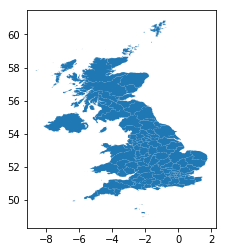

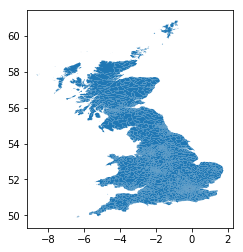

In [10]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

print("FIGURE 1")
plt.figure(0)
fp = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Areas.shp")
map_df = gpd.read_file(fp)
print(map_df.head())
map_df.plot()
print("FIGURE 2")
plt.figure(1)
fp2 = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
map_df2 = gpd.read_file(fp2)
print(map_df2.head())
map_df2.plot()
plt.show()

In [ ]:
for x in map_df2.name.unique():
    print(x)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 6))

In [ ]:
map_df2.plot(ax=ax)
ax.axis('off')
plt.show()

In [11]:
postcodes = map_df.name.unique()

print(postcodes)

['AB' 'AL' 'B' 'BA' 'BB' 'BD' 'BH' 'BL' 'BN' 'BR' 'BS' 'CA' 'CB' 'CF' 'CH'
 'CM' 'CO' 'CR' 'CT' 'CV' 'CW' 'DA' 'DD' 'DE' 'DG' 'DH' 'DL' 'DN' 'DT' 'DY'
 'E' 'EC' 'EH' 'EN' 'EX' 'FK' 'FY' 'G' 'GL' 'GU' 'HA' 'HD' 'HG' 'HP' 'HR'
 'HS' 'HU' 'HX' 'IG' 'IP' 'IV' 'KA' 'KT' 'KW' 'KY' 'L' 'LA' 'LD' 'LE' 'LL'
 'LN' 'LS' 'LU' 'M' 'ME' 'MK' 'ML' 'N' 'NE' 'NG' 'NN' 'NP' 'NR' 'NW' 'OL'
 'OX' 'PA' 'PE' 'PH' 'PL' 'PO' 'PR' 'RG' 'RH' 'RM' 'S' 'SA' 'SE' 'SG' 'SK'
 'SL' 'SM' 'SN' 'SO' 'SP' 'SR' 'SS' 'ST' 'SW' 'SY' 'TA' 'TD' 'TF' 'TN' 'TQ'
 'TR' 'TS' 'TW' 'UB' 'W' 'WA' 'WC' 'WD' 'WF' 'WN' 'WR' 'WS' 'WV' 'YO' 'ZE'
 'BT' 'GY' 'IM' 'JE']


In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
df1 = map_df
df1["val"] = [ random.randint(1,1000) for k in df1.index ]

In [ ]:
plt.figure(2)
df1.plot(column='val', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()

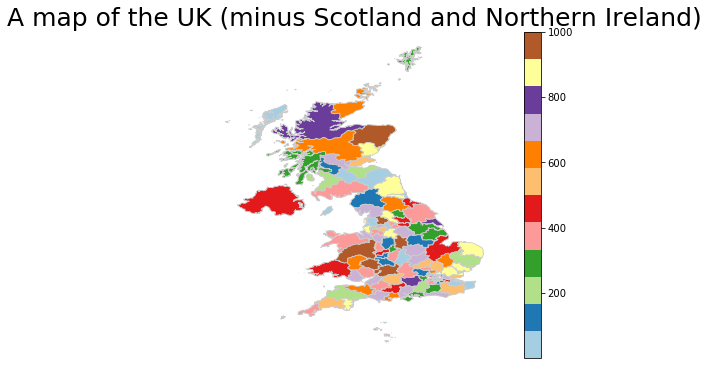

  name                                           geometry  val
0   AB  POLYGON ((-2.210914257091547 56.88580453335538...  979
1   AL  POLYGON ((-0.3713768893290278 51.6872990427223...  645
2    B  POLYGON ((-2.054359660178655 52.24755747627114...  357
3   BA  POLYGON ((-2.084295514297709 51.31717052350098...  391
4   BB  POLYGON ((-2.215571252608544 53.73160415979756...  907
FINISHED


In [4]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Areas.shp")
output_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/output.csv")

colormap = 'Paired'

plt.figure(0)
map_df = gpd.read_file(shape_path)
map_df["val"] = [ random.randint(1,1000) for k in map_df.index ]
fig, ax = plt.subplots(1, figsize=(10, 6))
mdfplt = map_df.plot(column='val', cmap=colormap, linewidth=0.8, ax=ax, edgecolor='0.8')

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("A map of the UK (minus Scotland and Northern Ireland)", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=1, vmax=1000))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()

print(map_df.head())
map_df.to_csv(output_path)

print("FINISHED")

In [ ]:
df21 = pd.read_csv(output_path)
df21.name.unique()

In [ ]:
datafile = os.path.expanduser("~\Documents\ScotDIST\Hackathon 26032019\pp-complete.csv/pp-complete.csv")
print(os.path.isfile(datafile))
file = pd.read_csv(datafile, header=None, iterator=True,
                   chunksize=1000, usecols=[1,2,3,4,5,6], parse_dates=True,
                   names=('Price', 'Date', 'PC', 'Type', 'New?', 'Freehold')
                  )

#pieces = [x.groupby('PC')['Price'].agg(['sum','count']) for x in file]
#agg2 = pd.concat(pieces).groupby(level=0).sum()
#print(agg2['sum']/agg2['count'])

In [9]:
import re
def areaCode(postcode):
    #print(postcode)
    try:
        return re.findall('([A-Z]+)', postcode)[0]
    except:
        print(type(postcode))
        print("ERROR: {}".format(postcode))

print(areaCode("AW21 3LF"))

def removeCommas(num):
    try:
        return int("".join(re.findall("(\d)",num)))
    except Exception as e:
        print(e)
        print(num)
        return

print(removeCommas('45,256'))

def str2f(num):
    try:
        return float(num)
    except:
        print("Failure str2f: {}".format(num))
        
print(str2f("32.56"))

AW
45256
32.56


invalid literal for int() with base 10: ''
45,256
None


In [ ]:
c = file.get_chunk()
c.head()
c = c[c.PC.notnull()]
c["PC"] = c["PC"].apply(areaCode)
c.head()


1054.1 426.8


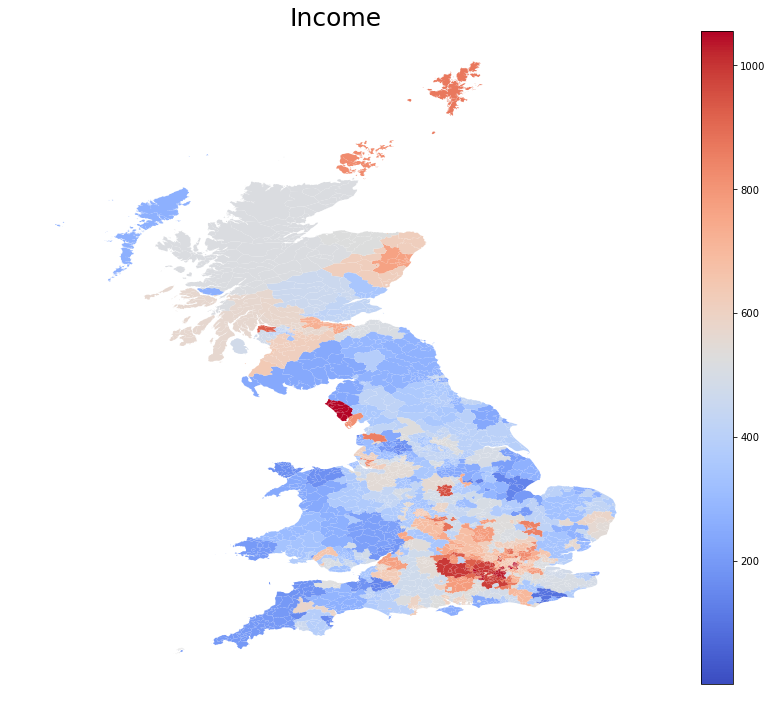

In [167]:
# National Pay Map

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
input_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/income_postcodes.csv")

colormap = plt.cm.coolwarm
colormap.set_under(color='#e0e0e0')

map_df = gpd.read_file(shape_path)

df = pd.read_csv(input_path)

df['PAY'] = df['PAY'].apply(str2f)

merged = map_df.set_index('name').join(df.set_index('PC_0'))
maxval = merged['PAY'].max()
minval = merged['PAY'].min()
print(maxval,minval)
merged['PAY'].fillna(-1, inplace=True)

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='PAY', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=400,vmax=700)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Income", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=1, vmax=maxval))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()


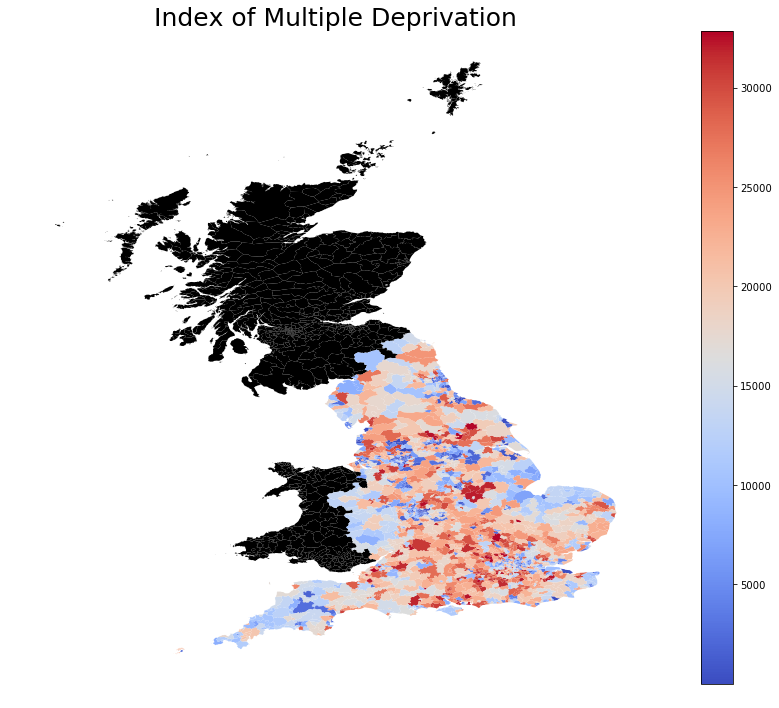

In [23]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
input_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/imd.csv")

colormap = plt.cm.coolwarm
colormap.set_under(color='#e0e0e0')

#plt.figure(0)
map_df = gpd.read_file(shape_path)

df = pd.read_csv(input_path)
#print("BEFORE MERGE")
#print("MAX {}".format(df['index'].max()))
#print(df.loc[df['index'].idxmax()])
#print("HEAD")
#print(df.head())

df['index'] = df['index'].apply(removeCommas)

merged = map_df.set_index('name').join(df.set_index('PC_0'))
merged['index'].fillna(-1, inplace=True)

#print("AFTER MERGE")
#print("MAX")
maxval = merged['index'].max()
#print(merged['index'].min())
#merged = merged[merged['index'].notnull()]
#merged = merged[merged['index'].isnull()]
#print(merged.head())

#plt.figure(0)

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='index', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=1)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Index of Multiple Deprivation", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=1, vmax=maxval))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()


2995
2321
OVERVIEW
                                               geometry        LAD  \
name                                                                 
AL1   POLYGON ((-0.3312054535337047 51.7618218549791...  E07000240   
AL10  POLYGON ((-0.2176684956158546 51.7529860383543...  E07000241   
AL2   POLYGON ((-0.3713768893290278 51.6872990427223...  E07000098   
AL3   POLYGON ((-0.3076601385826107 51.7831170159448...  E06000056   
AL4   POLYGON ((-0.3076601385826091 51.7831170159448...  E07000098   

                       AREA    PAY        PC  PC_1       LSOA    index  \
name                                                                     
AL1               St Albans  604.6  AL1  9FY   9FY  E01023665  29152.0   
AL10        Welwyn Hatfield  653.9  AL10 0PD   0PD  E01023920   8669.0   
AL2               Hertsmere  624.3  AL2  2EJ   2EJ  E01023526  32633.0   
AL3   Central Bedfordshire   546.1  AL3  8QE   8QE  E01017561  24376.0   
AL4               Hertsmere  624.3  AL4  0PD  

C:\Users\Foggy\Anaconda3\envs\hackathon\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10
C:\Users\Foggy\Anaconda3\envs\hackathon\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log10


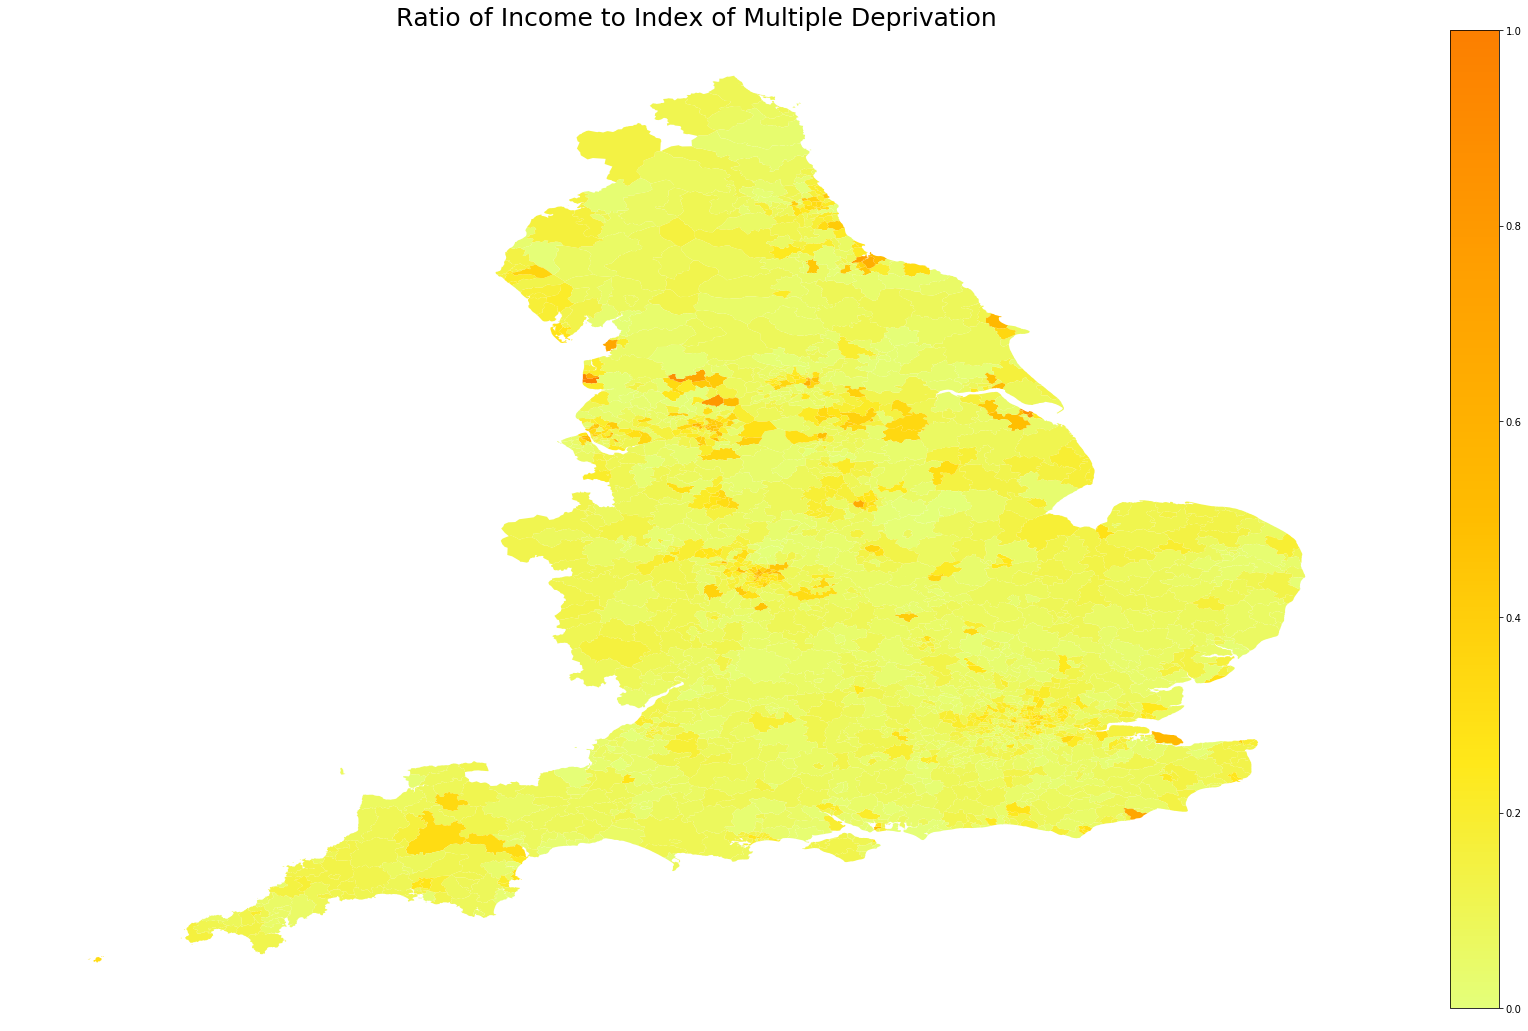

In [71]:
# Income vs Deprivation

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
income_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/income_postcodes.csv")
deprivation_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/imd.csv")

colormap = plt.cm.Wistia
colormap.set_under(color='#000000')
colormap.set_bad(color='#000000')

#plt.figure(0)
map_df = gpd.read_file(shape_path)

income_df = pd.read_csv(income_path)
deprivation_df = pd.read_csv(deprivation_path)

print(len(income_df['PC_0']))
print(len(deprivation_df['PC_0']))

income_df['PAY'] = income_df['PAY'].apply(str2f)
deprivation_df['index'] = deprivation_df['index'].apply(removeCommas)

del deprivation_df['PC']
del deprivation_df['PC_1']

halfmerged = map_df.set_index('name').join(income_df.set_index('PC_0'))
merged = halfmerged.join(deprivation_df.set_index('PC_0'))

merged['PAY'].fillna(0, inplace=True)
merged['index'].fillna(-1, inplace=True)

merged['ratio'] = merged['PAY']/merged['index']
merged['float'] = np.log10(merged['ratio'])
#merged['ratio'] = math.log(merged['PAY']/merged['index'],10)

maxval = merged['ratio'].max()

merged = merged[merged['ratio']>0]
print("OVERVIEW")
print(merged.head())

fig, ax = plt.subplots(1, figsize=(30, 18))
merged.plot(column='float', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0')

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Ratio of Income to Index of Multiple Deprivation", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=1))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()


     PC          price
0  AL10  197335.335741
1   AL2  281076.606126
2   AL3  323014.807411
3   AL4  293761.934656
4   AL5  437447.956048
7.83626921134
3.39794000867
OVERVIEW
                                               geometry     price
name                                                             
AL10  POLYGON ((-0.2176684956158546 51.7529860383543...  5.295205
AL2   POLYGON ((-0.3713768893290278 51.6872990427223...  5.448825
AL3   POLYGON ((-0.3076601385826107 51.7831170159448...  5.509222
AL4   POLYGON ((-0.3076601385826091 51.7831170159448...  5.467996
AL5   (POLYGON ((-0.302607636951766 51.7472069430249...  5.640926


C:\Users\Foggy\Anaconda3\envs\hackathon\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


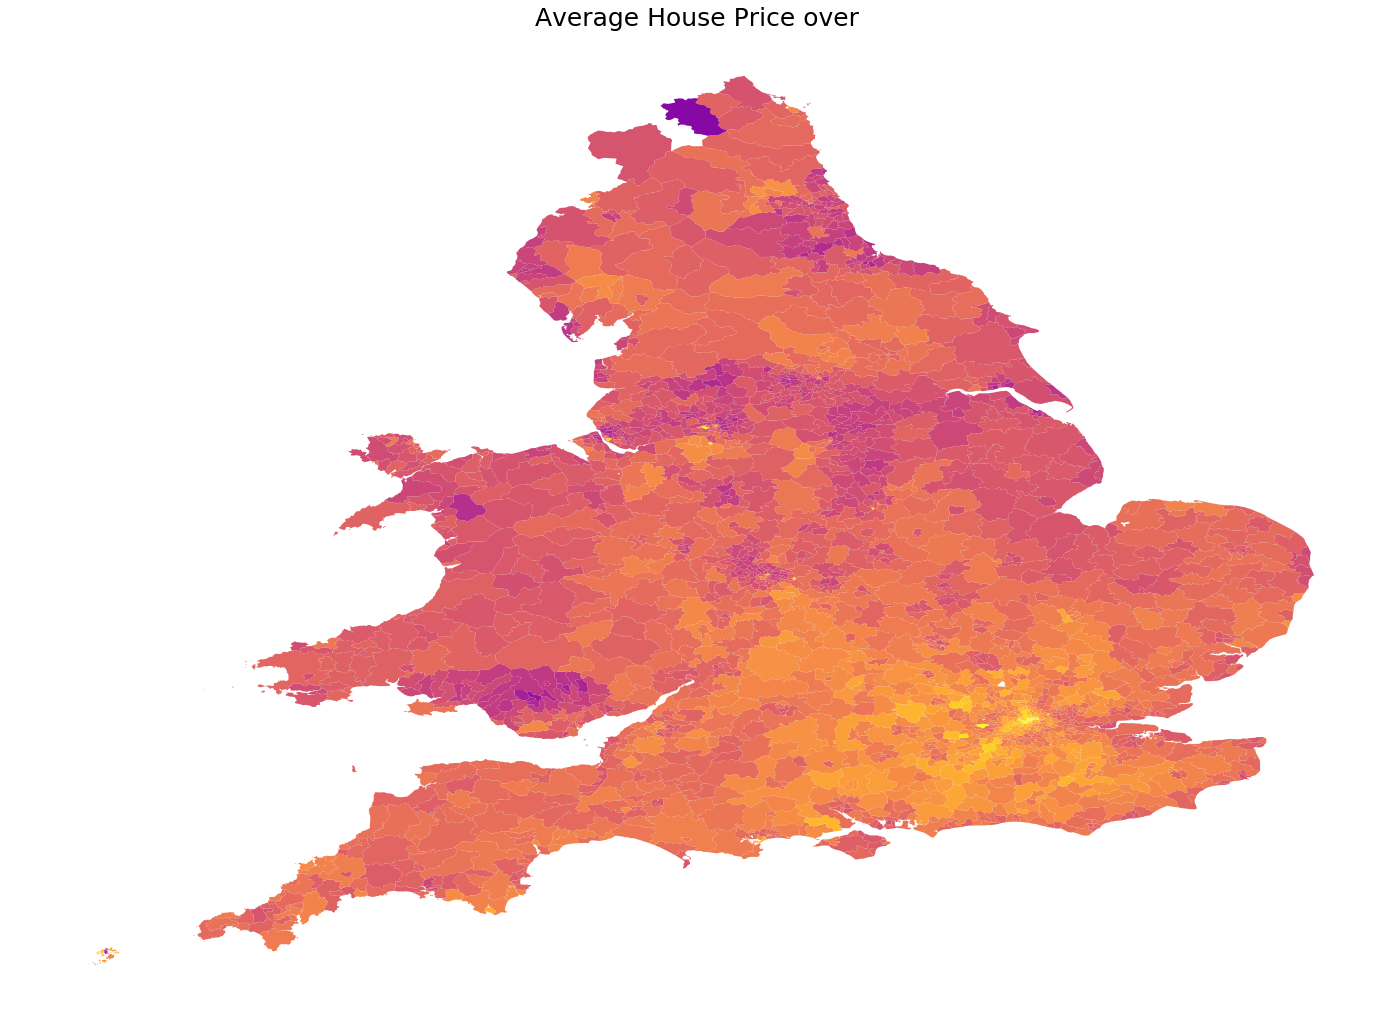

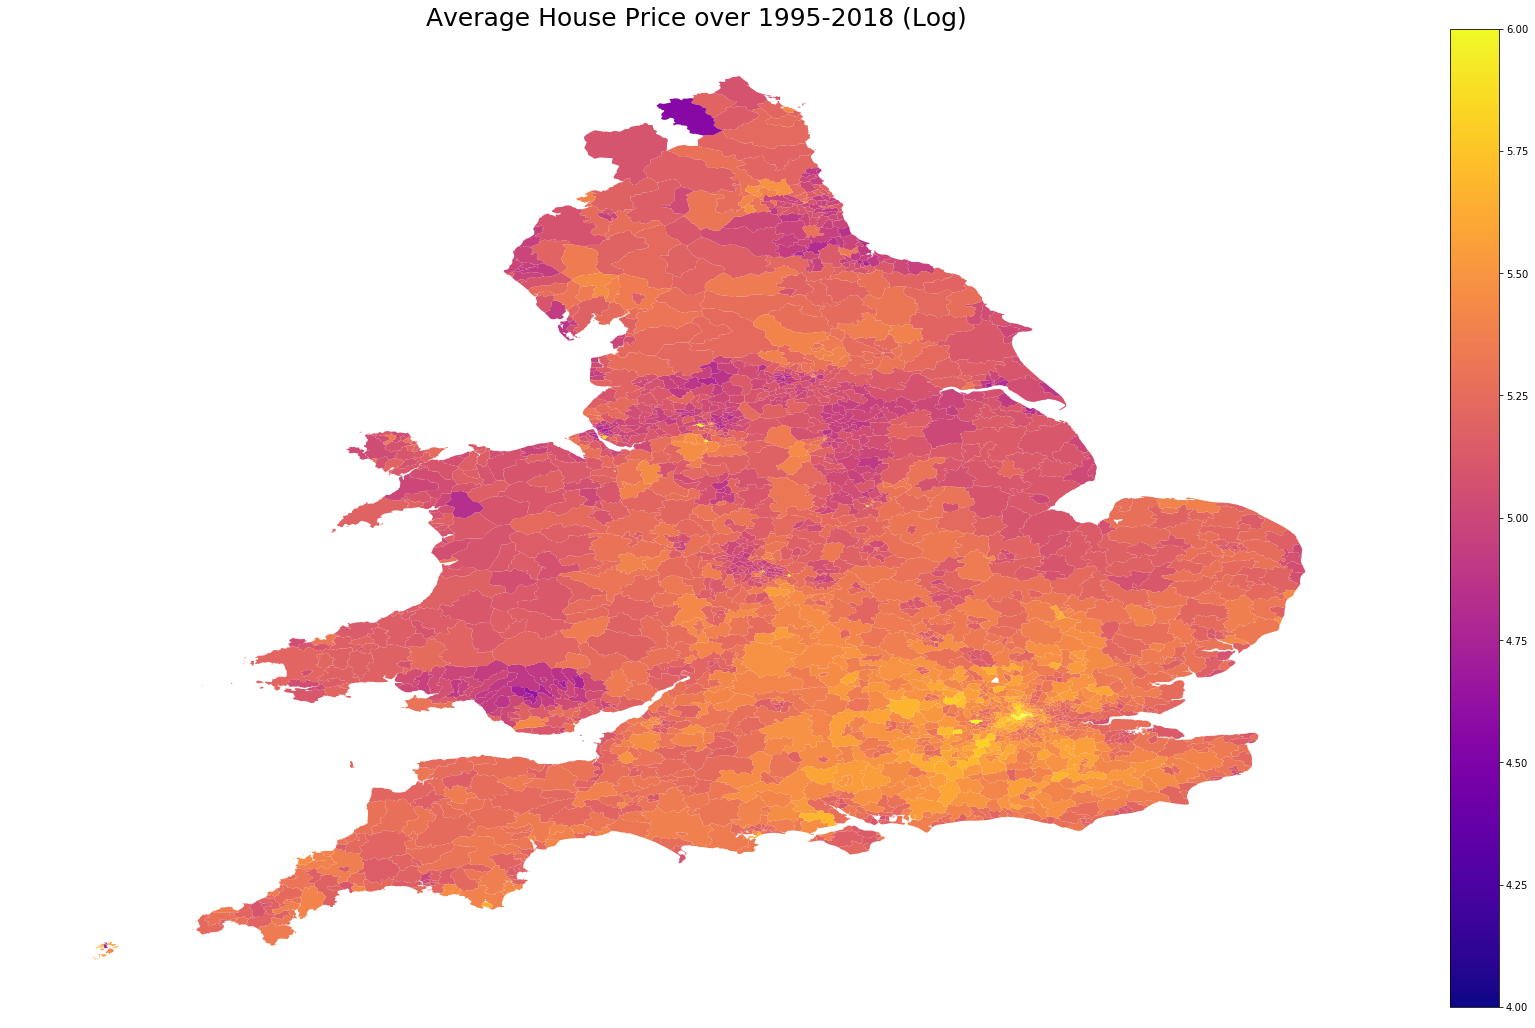

In [236]:
# Mean Price Geographically

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
price_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/Area_mean.csv")

colormap = plt.cm.plasma
colormap.set_under(color='#000000')
colormap.set_bad(color='#000000')

#plt.figure(0)
map_df = gpd.read_file(shape_path)

price_df = pd.read_csv(price_path,header=0,names=["PC","price"])
print(price_df.head())

merged = map_df.set_index('name').join(price_df.set_index('PC'))

merged['price'].fillna(-1, inplace=True)

merged['price'] = np.log10(merged['price'])

maxval = merged['price'].max()
print(maxval)

merged = merged[merged['price']>0]

print(merged['price'].min())

print("OVERVIEW")
print(merged.head())

fig, ax = plt.subplots(1, figsize=(30, 18))
merged.plot(column='price', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=4,vmax=6)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Average House Price over 1995-2018 (Log)", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=4, vmax=6))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/geo_price_full.png")
fig.savefig(savefile)


     PC          price
0  AL10  197335.335741
1   AL2  281076.606126
2   AL3  323014.807411
3   AL4  293761.934656
4   AL5  437447.956048
7.83626921134
3.39794000867
OVERVIEW
                                               geometry  price
name                                                          
AB10  POLYGON ((-2.116454759005259 57.14656265903432...    NaN
AB11  (POLYGON ((-2.052573095588467 57.1342600856536...    NaN
AB12  (POLYGON ((-2.128066321470298 57.0368357386797...    NaN
AB13  POLYGON ((-2.261525922489881 57.10693578217748...    NaN
AB14  POLYGON ((-2.261525922489878 57.10693578217748...    NaN


C:\Users\Foggy\Anaconda3\envs\hackathon\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10
C:\Users\Foggy\Anaconda3\envs\hackathon\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


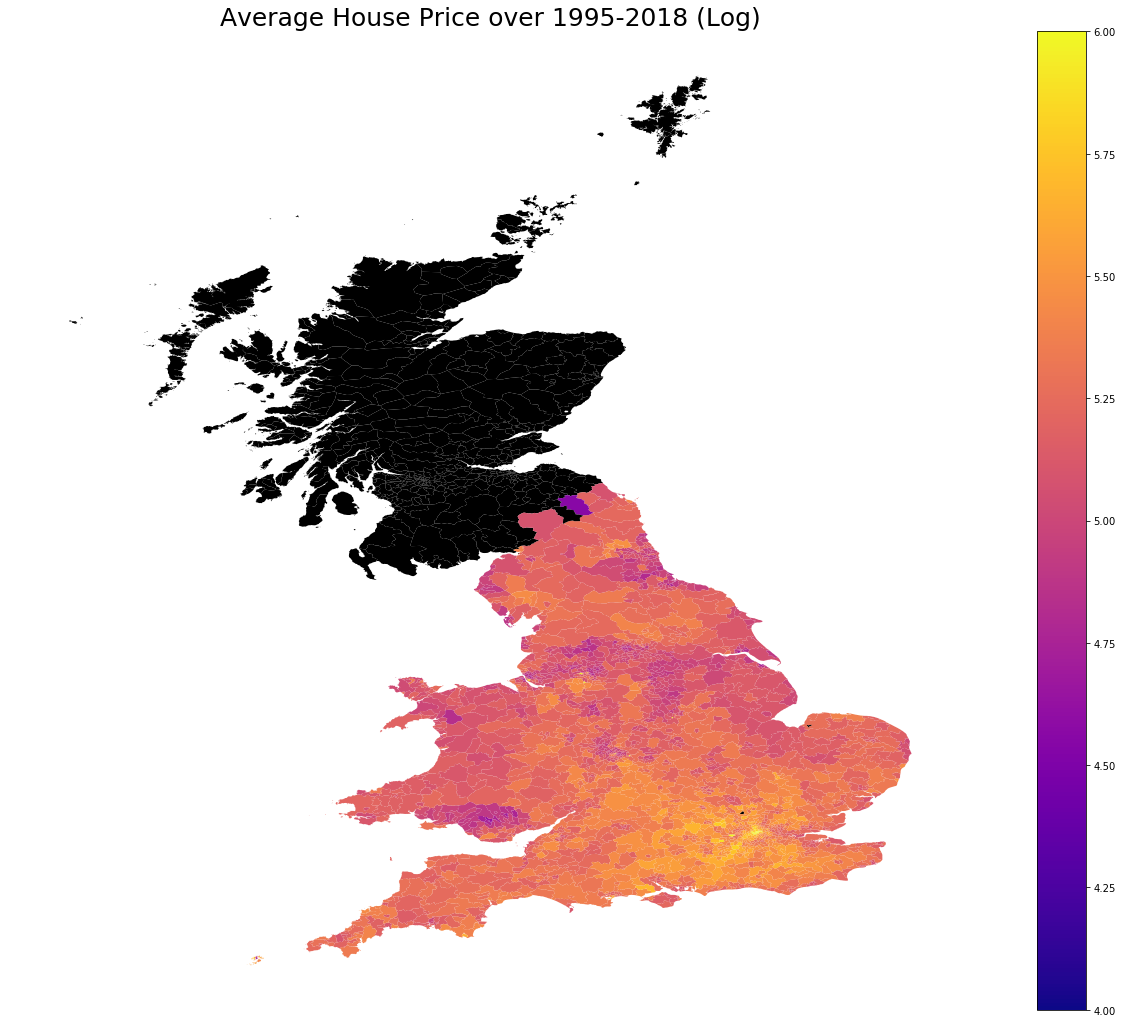

In [237]:
# Mean Price Geographically

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
price_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/Area_mean.csv")

colormap = plt.cm.plasma
colormap.set_under(color='#000000')
colormap.set_bad(color='#000000')

#plt.figure(0)
map_df = gpd.read_file(shape_path)

price_df = pd.read_csv(price_path,header=0,names=["PC","price"])
print(price_df.head())

merged = map_df.set_index('name').join(price_df.set_index('PC'))

merged['price'].fillna(-1, inplace=True)

merged['price'] = np.log10(merged['price'])

maxval = merged['price'].max()
print(maxval)

#merged = merged[merged['price']>0]

print(merged['price'].min())

print("OVERVIEW")
print(merged.head())

fig, ax = plt.subplots(1, figsize=(30, 18))
merged.plot(column='price', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=4,vmax=6)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Average House Price over 1995-2018 (Log)", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=4, vmax=6))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/geo_price_full.png")
fig.savefig(savefile)


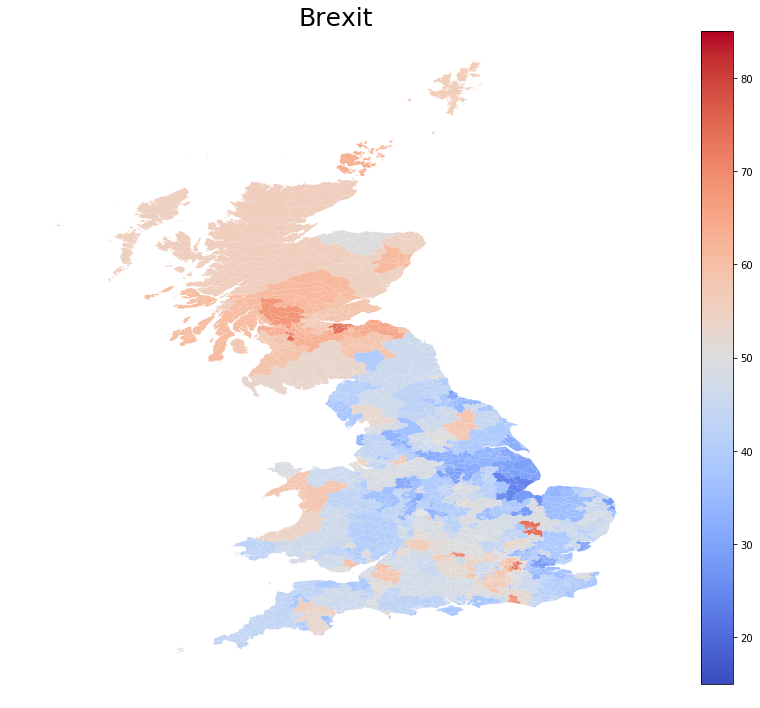

In [205]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
input_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/brexit_postcodes.csv")

colormap = plt.cm.coolwarm
colormap.set_under(color='#e0e0e0')

#plt.figure(0)
map_df = gpd.read_file(shape_path)

df = pd.read_csv(input_path)
#print("BEFORE MERGE")
#print("MAX {}".format(df['index'].max()))
#print(df.loc[df['index'].idxmax()])
#print("HEAD")
#print(df.head())

#df['index'] = df['index'].

merged = map_df.set_index('name').join(df.set_index('PC_0'))
merged['LEAVE'].fillna(-1, inplace=True)

#print("AFTER MERGE")
#print("MAX")
maxval = merged['LEAVE'].max()
#print(merged['index'].min())
#merged = merged[merged['index'].notnull()]
#merged = merged[merged['index'].isnull()]
#print(merged.head())

#plt.figure(0)

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='REMAIN', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=15,vmax=85)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Brexit", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=15, vmax=85))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/brexit_full.png")
fig.savefig(savefile)

      Unnamed: 0    Date          Mean       Price  Count            avg
PC_0                                                                    
AL          1310   20180  5.956126e+06  2036773280   3491  583435.485534
B          88997  155386  3.950928e+07  7219322618  26655  270843.092028
BA         43643   38342  6.194470e+06  2860433218   7881  362953.079305
BB         34853   26234  1.880588e+06  1173057502   8132  144252.029267
BD         75000   48432  3.953294e+06  1476535060   8714  169444.005049
                                               geometry  Unnamed: 0      Date  \
name                                                                            
AB    POLYGON ((-2.210914257091547 56.88580453335538...         NaN       NaN   
AL    POLYGON ((-0.3713768893290278 51.6872990427223...      1310.0   20180.0   
B     POLYGON ((-2.054359660178655 52.24755747627114...     88997.0  155386.0   
BA    POLYGON ((-2.084295514297709 51.31717052350098...     43643.0   38342.0   
BB 

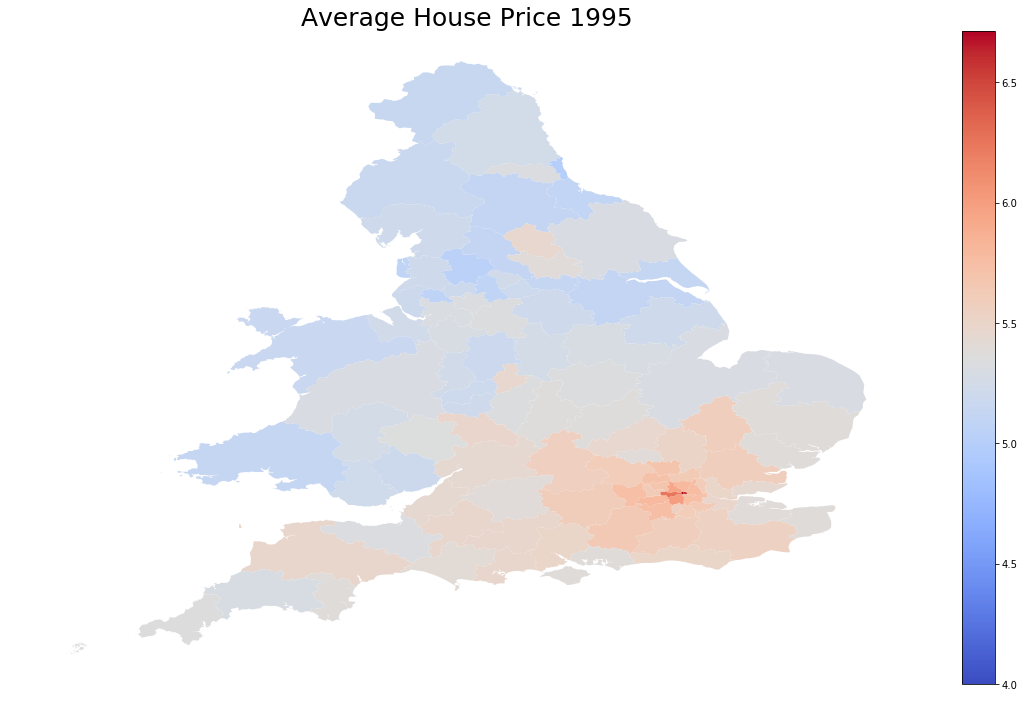

In [254]:
# Consolidating Districts into Areas

def pc0(pc):
    return re.findall("([A-Z]+)",pc)[0]

colormap = plt.cm.coolwarm
colormap.set_under(color='#000000')
colormap.set_bad(color='#000000')

input_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/per_year_2018.csv")
area_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Areas.shp")
df = pd.read_csv(input_path)
map_df = gpd.read_file(area_path)

df['PC_0'] = df['Area'].apply(pc0)

gb = df.groupby(df['PC_0'])

summed = gb.sum()
summed['avg'] = summed['Price']/summed['Count']

print(summed.head())

merged = map_df.set_index('name').join(summed)
merged['avg'] = np.log10(merged['avg'])
mergemean = merged['avg'].median()
minval = mergemean - maxval + mergemean
#merged['avg'].fillna(-1,inplace=True)

print(merged.head())
maxval = merged['avg'].max()
print(maxval)
print(mergemean)
merged = merged[merged['avg'].notnull()]

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='avg', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=4.2,vmax=6.7)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Average House Price 1995", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=4, vmax=maxval))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/price_2018.png")
fig.savefig(savefile)

      Unnamed: 0    Date          Mean       Price  Count            avg
PC_0                                                                    
AL          1080   19950  1.037107e+06   387459883   3839  100927.294347
B          85752  149625  4.416939e+06  1354852992  22283   60802.090921
BA         43206   37905  1.247070e+06   452246605   6719   67308.618098
BB         34554   25935  5.476442e+05   341776445   8287   41242.481598
BD         74448   47880  1.168851e+06   386527342   8089   47784.317221
                                               geometry  Unnamed: 0      Date  \
name                                                                            
AB    POLYGON ((-2.210914257091547 56.88580453335538...         NaN       NaN   
AL    POLYGON ((-0.3713768893290278 51.6872990427223...      1080.0   19950.0   
B     POLYGON ((-2.054359660178655 52.24755747627114...     85752.0  149625.0   
BA    POLYGON ((-2.084295514297709 51.31717052350098...     43206.0   37905.0   
BB 

C:\Users\Foggy\Anaconda3\envs\hackathon\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


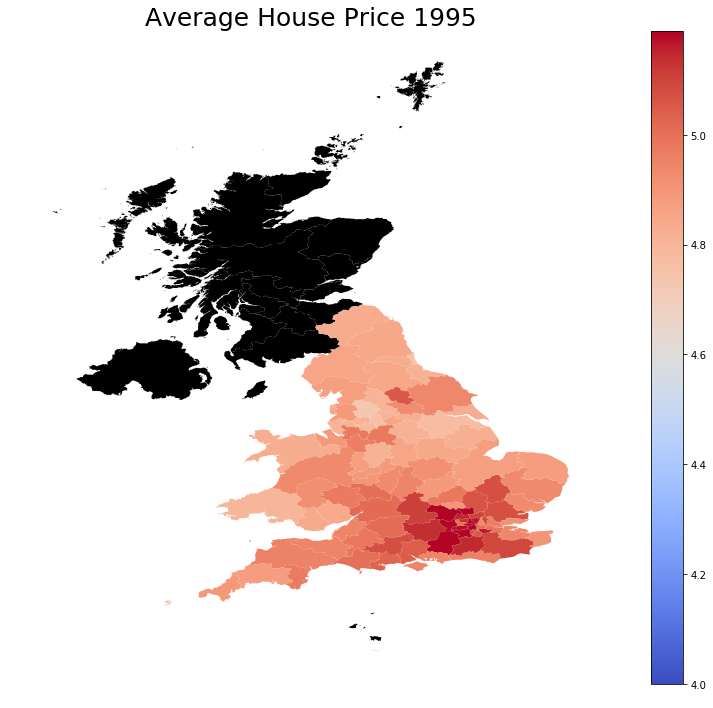

In [174]:
# Consolidating Districts into Areas

def pc0(pc):
    return re.findall("([A-Z]+)",pc)[0]

colormap = plt.cm.coolwarm
colormap.set_under(color='#000000')
colormap.set_bad(color='#000000')

input_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/per_year_1995.csv")
area_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Areas.shp")
df = pd.read_csv(input_path)
map_df = gpd.read_file(area_path)

df['PC_0'] = df['Area'].apply(pc0)

gb = df.groupby(df['PC_0'])

summed = gb.sum()
summed['avg'] = summed['Price']/summed['Count']

print(summed.head())

merged = map_df.set_index('name').join(summed)
merged['avg'] = np.log10(merged['avg'])
mergemean = merged['avg'].median()
minval = mergemean - maxval + mergemean
#merged['avg'].fillna(-1,inplace=True)

print(merged.head())
maxval = merged['avg'].max()
print(maxval)
print(mergemean)

fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='avg', cmap=colormap, linewidth=0., ax=ax, edgecolor='1.0',vmin=4,vmax=5)

# Remove axes
ax.axis('off')

# Create Title
ax.set_title("Average House Price 1995", fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=4, vmax=maxval))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()

                                               geometry        LAD  REMAIN  \
name                                                                         
AB10  POLYGON ((-2.116454759005259 57.14656265903432...  S12000033    -1.0   
AB11  (POLYGON ((-2.052573095588467 57.1342600856536...  S12000033    -1.0   
AB12  (POLYGON ((-2.128066321470298 57.0368357386797...  S12000033    -1.0   
AB13  POLYGON ((-2.261525922489881 57.10693578217748...  S12000033    -1.0   
AB14  POLYGON ((-2.261525922489878 57.10693578217748...  S12000033    -1.0   

      LEAVE        PC PC_1  price  
name                               
AB10   38.9  AB10 1JA  1JA   -1.0  
AB11   38.9  AB11 9JS  9JS   -1.0  
AB12   38.9  AB12 3AX  3AX   -1.0  
AB13   38.9  AB13 0AN  0AN   -1.0  
AB14   38.9  AB14 0LD  0LD   -1.0  


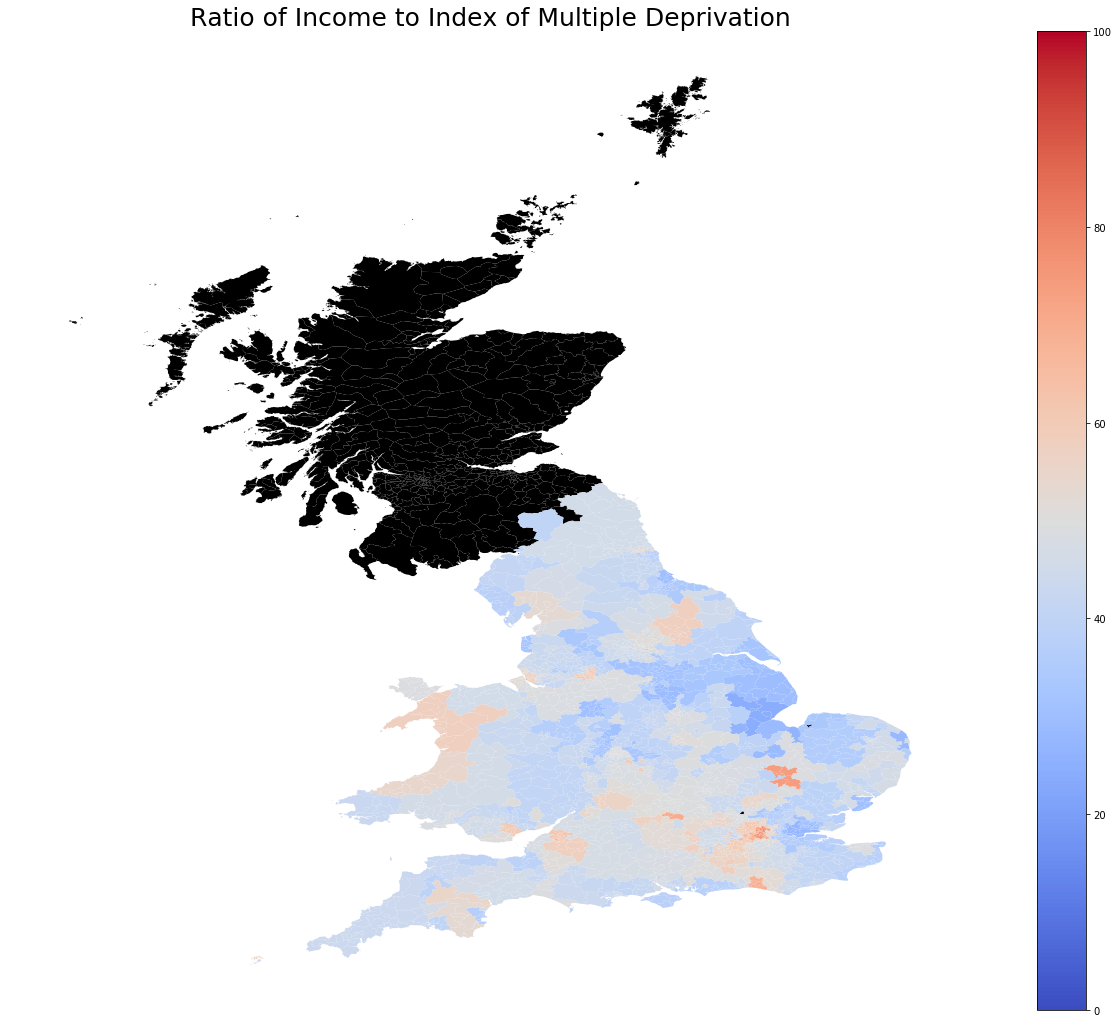

In [199]:
# Plots of Income and Brexit

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
brexit_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/brexit_postcodes.csv")
price_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/Area_mean.csv")

colormap1 = plt.cm.coolwarm
colormap1.set_under(color='#000000')
colormap1.set_bad(color='#000000')

colormap2 = plt.cm.plasma
colormap2.set_under(color='#000000')
colormap2.set_bad(color='#000000')

# Join the data together and default the NaNs
map_df = gpd.read_file(shape_path)

brexit_df = pd.read_csv(brexit_path)
price_df = pd.read_csv(price_path,header=0,names=["PC","price"])

halfmerged = map_df.set_index('name').join(brexit_df.set_index('PC_0'))
merged = halfmerged.join(price_df.set_index('PC'))

merged['price'] = np.where(merged['price'].isnull(),-1,merged['price'])
merged['price'] = np.where(merged['REMAIN'].isnull(),-1,merged['price'])
merged['REMAIN'] = np.where(merged['price']==-1,-1,merged['REMAIN'])

#merged['price'] = np.where((merged['price'].isnull() or merged['REMAIN'].isnull()).any(), -1, merged['price'])

#merged = merged[(merged['price'].notnull()) & (merged['REMAIN'].notnull())]

print(merged.head())

# Print Brexit
fig, ax = plt.subplots(1, figsize=(30, 18))
merged.plot(column='REMAIN', cmap=colormap1, linewidth=0., ax=ax, edgecolor='1.0',vmin=0,vmax=100)

# Remove axes
ax.axis('off')
# Create Title
ax.set_title("Ratio of Income to Index of Multiple Deprivation", fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=100))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/brexit.pdf")
fig.savefig(savefile)

                                               geometry        LAD  REMAIN  \
name                                                                         
AL10  POLYGON ((-0.2176684956158546 51.7529860383543...  E07000241   47.01   
AL2   POLYGON ((-0.3713768893290278 51.6872990427223...  E07000098   49.16   
AL3   POLYGON ((-0.3076601385826107 51.7831170159448...  E06000056   43.87   
AL4   POLYGON ((-0.3076601385826091 51.7831170159448...  E07000098   49.16   
AL5   (POLYGON ((-0.302607636951766 51.7472069430249...  E06000056   43.87   

      LEAVE        PC  PC_1          price  
name                                        
AL10  52.99  AL10 0PD   0PD  197335.335741  
AL2   50.84  AL2  2EJ   2EJ  281076.606126  
AL3   56.13  AL3  8QE   8QE  323014.807411  
AL4   50.84  AL4  0PD   0PD  293761.934656  
AL5   56.13  AL5  3QF   3QF  437447.956048  


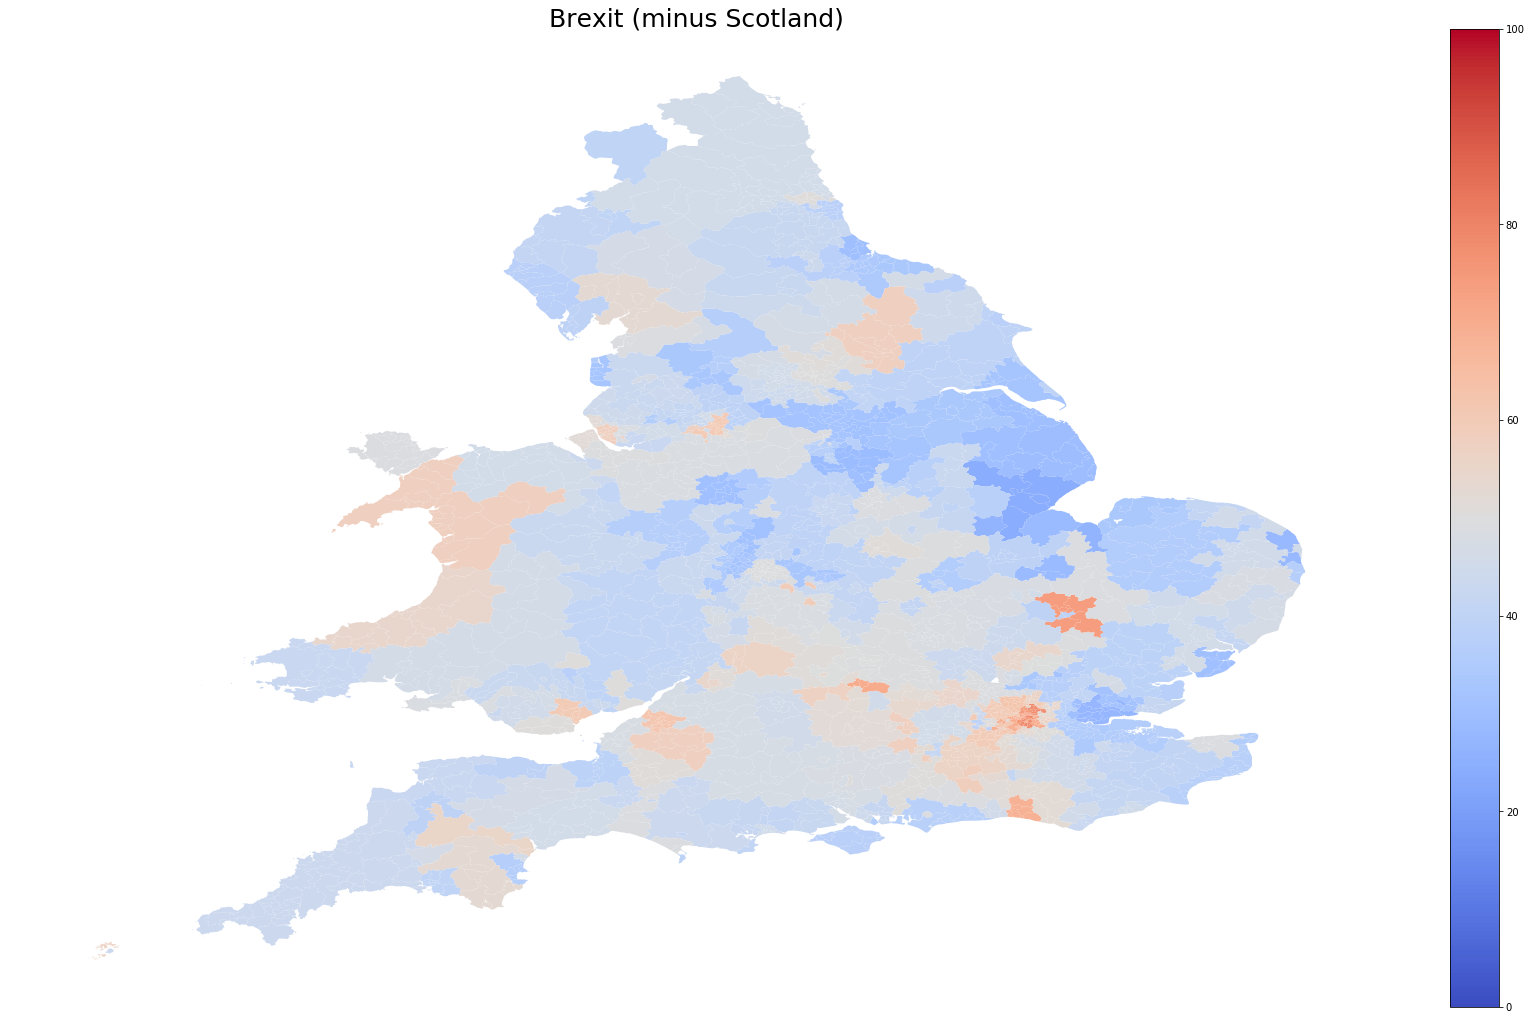

In [203]:
# Plots of Income and Brexit

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
brexit_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/brexit_postcodes.csv")
price_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/Area_mean.csv")

colormap1 = plt.cm.coolwarm
colormap1.set_under(color='#000000')
colormap1.set_bad(color='#000000')

colormap2 = plt.cm.plasma
colormap2.set_under(color='#000000')
colormap2.set_bad(color='#000000')

# Join the data together and default the NaNs
map_df = gpd.read_file(shape_path)

brexit_df = pd.read_csv(brexit_path)
price_df = pd.read_csv(price_path,header=0,names=["PC","price"])

halfmerged = map_df.set_index('name').join(brexit_df.set_index('PC_0'))
merged = halfmerged.join(price_df.set_index('PC'))

#merged['price'] = np.where(merged['price'].isnull(),-1,merged['price'])
#merged['price'] = np.where(merged['REMAIN'].isnull(),-1,merged['price'])
#merged['REMAIN'] = np.where(merged['price']==-1,-1,merged['REMAIN'])

#merged['price'] = np.where((merged['price'].isnull() or merged['REMAIN'].isnull()).any(), -1, merged['price'])

merged = merged[(merged['price'].notnull()) & (merged['REMAIN'].notnull())]

print(merged.head())

# Print Brexit
fig, ax = plt.subplots(1, figsize=(30, 18))
merged.plot(column='REMAIN', cmap=colormap1, linewidth=0., ax=ax, edgecolor='1.0',vmin=0,vmax=100)

# Remove axes
ax.axis('off')
# Create Title
ax.set_title("Brexit (minus Scotland)", fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=0, vmax=100))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/brexit_full.png")
fig.savefig(savefile)

1054.1
426.8
                                               geometry        LAD  \
name                                                                 
AL10  POLYGON ((-0.2176684956158546 51.7529860383543...  E07000241   
AL2   POLYGON ((-0.3713768893290278 51.6872990427223...  E07000098   
AL3   POLYGON ((-0.3076601385826107 51.7831170159448...  E06000056   
AL4   POLYGON ((-0.3076601385826091 51.7831170159448...  E07000098   
AL5   (POLYGON ((-0.302607636951766 51.7472069430249...  E06000056   

                       AREA    PAY        PC  PC_1          price  
name                                                               
AL10        Welwyn Hatfield  653.9  AL10 0PD   0PD  197335.335741  
AL2               Hertsmere  624.3  AL2  2EJ   2EJ  281076.606126  
AL3   Central Bedfordshire   546.1  AL3  8QE   8QE  323014.807411  
AL4               Hertsmere  624.3  AL4  0PD   0PD  293761.934656  
AL5   Central Bedfordshire   546.1  AL5  3QF   3QF  437447.956048  


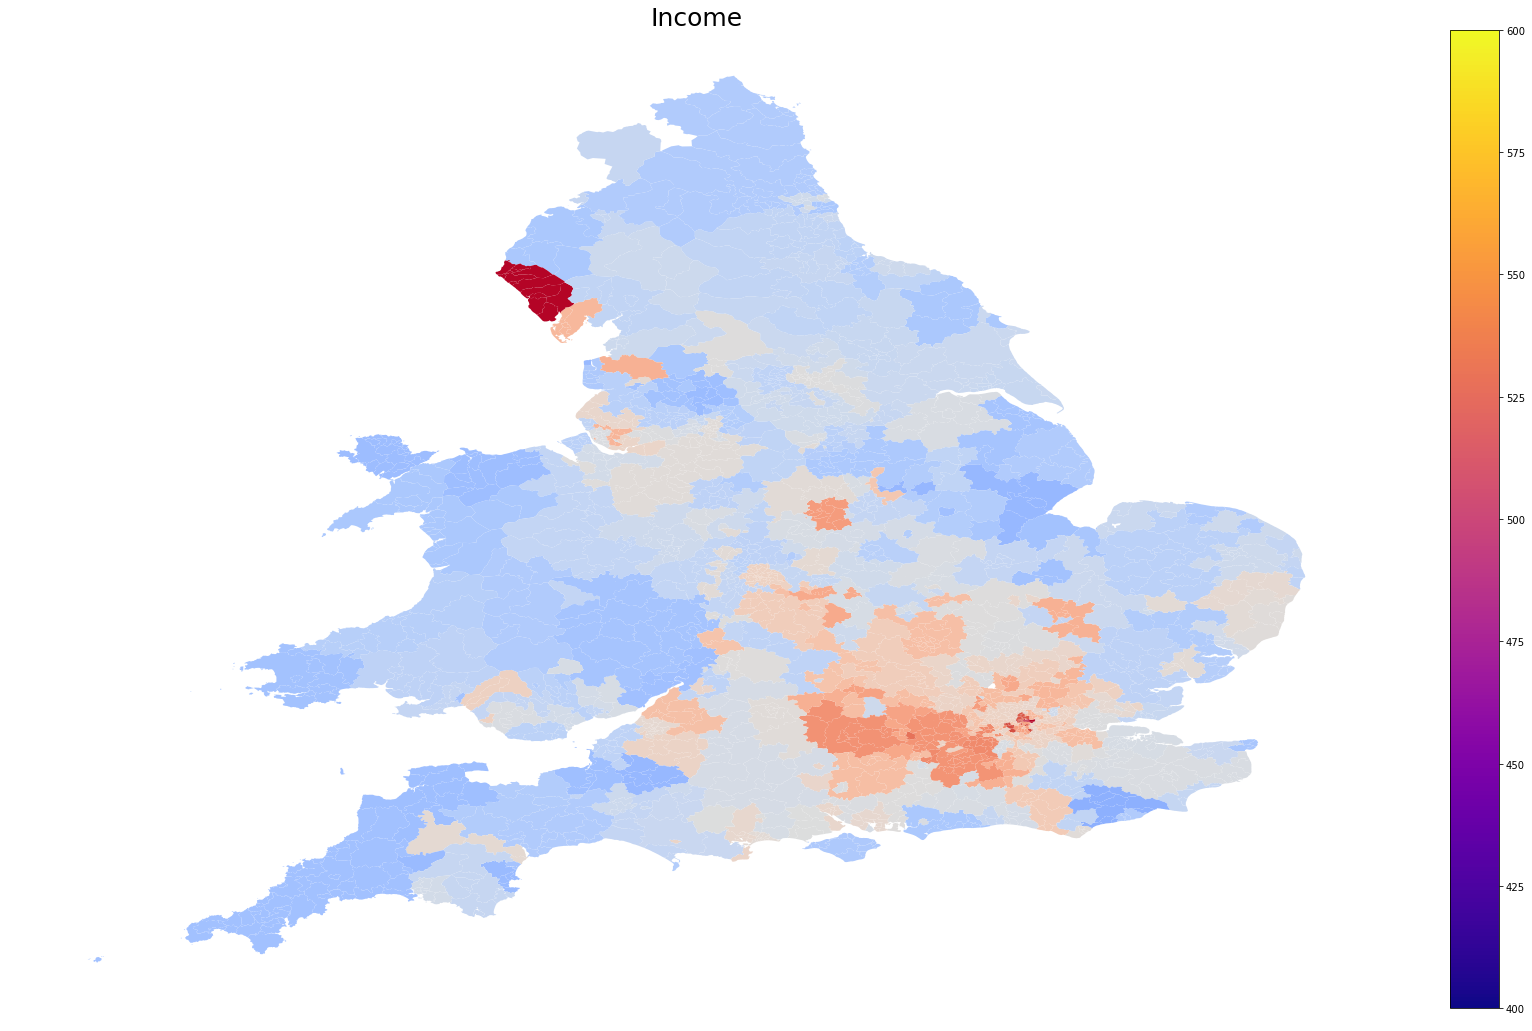

In [238]:
# Plots of Income and Brexit

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
brexit_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/income_postcodes.csv")
price_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/Area_mean.csv")

colormap1 = plt.cm.coolwarm

colormap2 = plt.cm.plasma
colormap2.set_under(color='#000000')
colormap2.set_bad(color='#000000')

# Join the data together and default the NaNs
map_df = gpd.read_file(shape_path)

brexit_df = pd.read_csv(brexit_path)
price_df = pd.read_csv(price_path,header=0,names=["PC","price"])

halfmerged = map_df.set_index('name').join(brexit_df.set_index('PC_0'))
merged = halfmerged.join(price_df.set_index('PC'))

#merged['price'] = np.where(merged['price'].isnull(),-1,merged['price'])
#merged['price'] = np.where(merged['REMAIN'].isnull(),-1,merged['price'])
#merged['REMAIN'] = np.where(merged['price']==-1,-1,merged['REMAIN'])

#merged['price'] = np.where((merged['price'].isnull() or merged['REMAIN'].isnull()).any(), -1, merged['price'])

merged = merged[(merged['price'].notnull()) & (merged['PAY'].notnull())]

print(merged['PAY'].max())
print(merged['PAY'].min())

print(merged.head())

# Print Brexit
fig, ax = plt.subplots(1, figsize=(30, 18))
merged.plot(column='PAY', cmap=colormap1, linewidth=0., ax=ax, edgecolor='1.0',vmin=300,vmax=800)

# Remove axes
ax.axis('off')
# Create Title
ax.set_title("Income", fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=400, vmax=600))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/pay.png")
fig.savefig(savefile)

10.0
1.0
                                               geometry       LSOA   index  \
name                                                                         
AL10  POLYGON ((-0.2176684956158546 51.7529860383543...  E01023920   8,669   
AL2   POLYGON ((-0.3713768893290278 51.6872990427223...  E01023526  32,633   
AL3   POLYGON ((-0.3076601385826107 51.7831170159448...  E01017561  24,376   
AL4   POLYGON ((-0.3076601385826091 51.7831170159448...  E01023584  15,027   
AL5   (POLYGON ((-0.302607636951766 51.7472069430249...  E01017564  20,155   

      index_scaled        PC  PC_1          price  
name                                               
AL10           3.0  AL10 0JR   0JR  197335.335741  
AL2           10.0  AL2  2EJ   2EJ  281076.606126  
AL3            8.0  AL3  8QE   8QE  323014.807411  
AL4            5.0  AL4  0PD   0PD  293761.934656  
AL5            7.0  AL5  3QF   3QF  437447.956048  


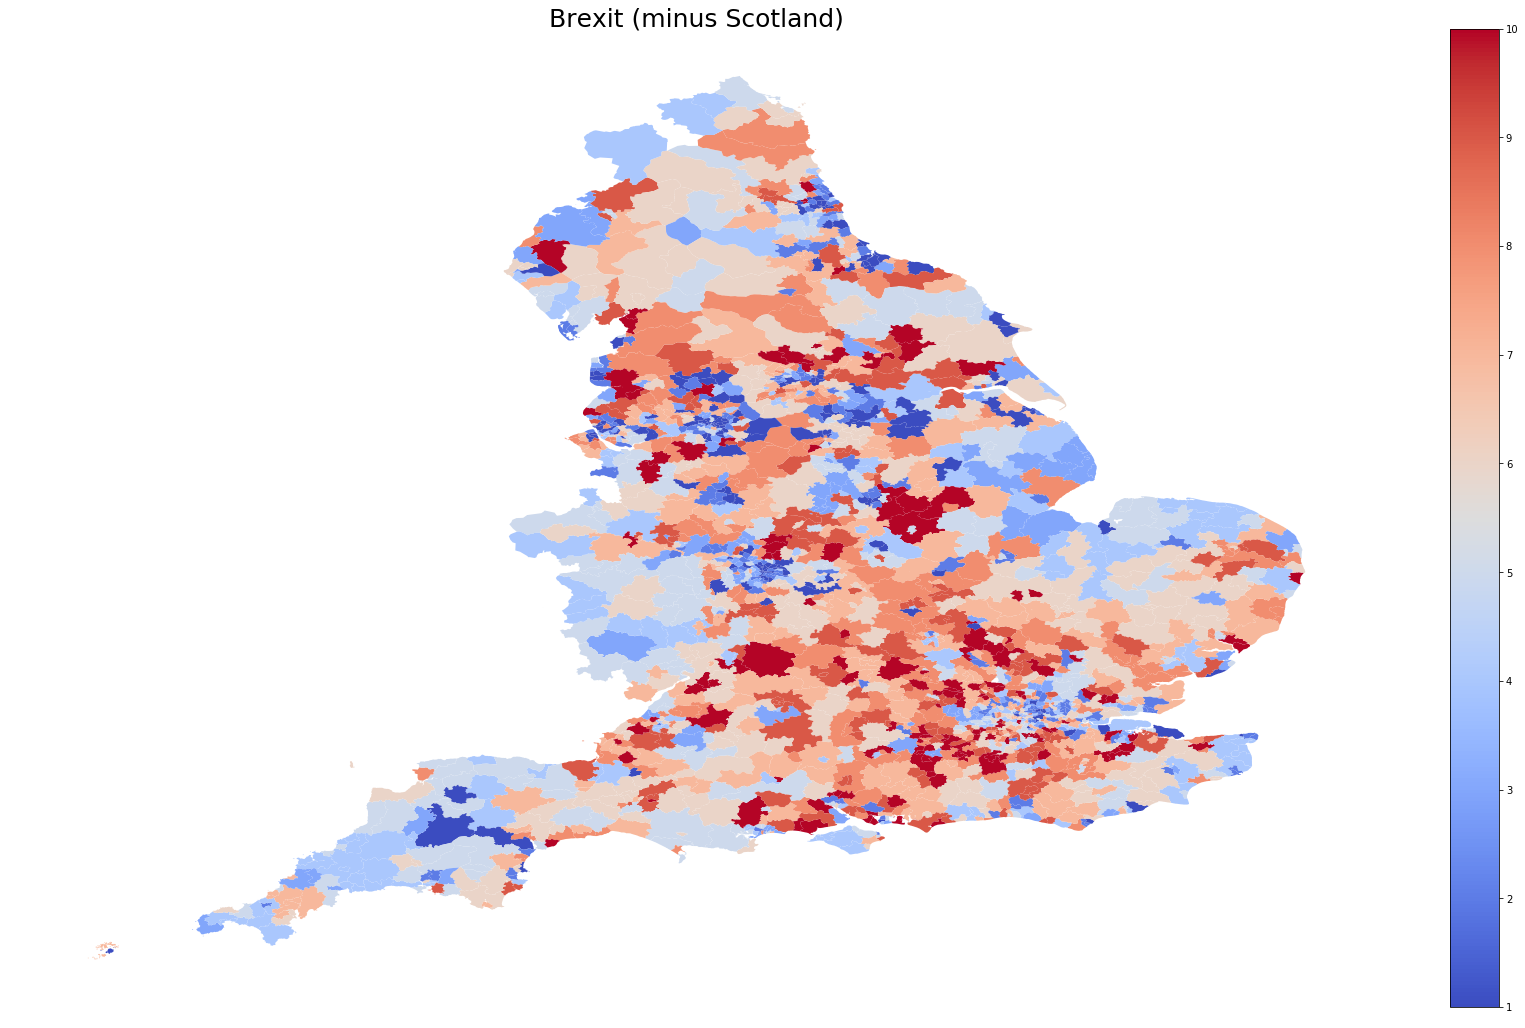

In [229]:
# Plots of Income and Brexit

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

shape_path = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/UK-postcode-boundaries-Jan-2015/Distribution/Districts.shp")
brexit_path = os.path.expanduser("~/Documents/GitHub/HESTIA/danka/imd.csv")
price_path = os.path.expanduser("~/Documents/GitHub/HESTIA/samuel/Area_mean.csv")

colormap1 = plt.cm.coolwarm

colormap2 = plt.cm.plasma
colormap2.set_under(color='#000000')
colormap2.set_bad(color='#000000')

# Join the data together and default the NaNs
map_df = gpd.read_file(shape_path)

brexit_df = pd.read_csv(brexit_path)
price_df = pd.read_csv(price_path,header=0,names=["PC","price"])

halfmerged = map_df.set_index('name').join(brexit_df.set_index('PC_0'))
merged = halfmerged.join(price_df.set_index('PC'))

#merged['price'] = np.where(merged['price'].isnull(),-1,merged['price'])
#merged['price'] = np.where(merged['REMAIN'].isnull(),-1,merged['price'])
#merged['REMAIN'] = np.where(merged['price']==-1,-1,merged['REMAIN'])

#merged['price'] = np.where((merged['price'].isnull() or merged['REMAIN'].isnull()).any(), -1, merged['price'])

merged = merged[(merged['index_scaled'].notnull()) & (merged['price'].notnull())]

print(merged['index_scaled'].max())
print(merged['index_scaled'].min())

print(merged.head())

# Print Brexit
fig, ax = plt.subplots(1, figsize=(30, 18))
merged.plot(column='index_scaled', cmap=colormap1, linewidth=0., ax=ax, edgecolor='1.0',vmin=1,vmax=10)

# Remove axes
ax.axis('off')
# Create Title
ax.set_title("Brexit (minus Scotland)", fontdict={'fontsize': '25', 'fontweight' : '3'})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=1, vmax=10))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
plt.show()

savefile = os.path.expanduser("~/Documents/GitHub/HESTIA/elliott/imd.png")
fig.savefig(savefile)